<a href="https://colab.research.google.com/github/Fahdlabba/Human-Face-Recognition/blob/main/HumanFace_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
!cp kaggle.json ~/.kaggle/

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d lylmsc/wider-face-for-yolo-training

 99% 2.43G/2.45G [00:34<00:00, 92.6MB/s]
100% 2.45G/2.45G [00:34<00:00, 76.2MB/s]


In [10]:
from zipfile import ZipFile

dataset="/content/wider-face-for-yolo-training.zip"
with ZipFile(dataset,'r') as zip :
  zip.extractall()

In [11]:
!mkdir /content/YoloV8

In [12]:
!mkdir /content/YoloV8/images
!mkdir /content/YoloV8/labels

In [1]:
image_path="/content/images"
labels_path="/content/labels"

train_image='/content/YoloV8/train/images'
train_labels='/content/YoloV8/train/labels'
val_image='/content/YoloV8/val/images'
val_labels='/content/YoloV8/val/labels'
test_images='/content/YoloV8/test/images'
test_labels='/content/YoloV8/test/labels'

In [3]:
import os 
import random

In [4]:
paths0=[]
for dirname, _, filenames in os.walk(image_path):
    for filename in filenames:
        paths0+=[(os.path.join(dirname, filename))]
paths0=random.sample(paths0,500)

In [5]:
print(len(paths0))

500


In [6]:
!mkdir /content/YoloV8/test
!mkdir /content/YoloV8/train
!mkdir /content/YoloV8/val

mkdir: cannot create directory ‘/content/YoloV8/test’: File exists
mkdir: cannot create directory ‘/content/YoloV8/train’: File exists
mkdir: cannot create directory ‘/content/YoloV8/val’: File exists


In [32]:
!mkdir /content/YoloV8/train/images
!mkdir /content/YoloV8/train/labels
!mkdir /content/YoloV8/val/images
!mkdir /content/YoloV8/val/labels
!mkdir /content/YoloV8/test/images
!mkdir /content/YoloV8/test/labels

In [7]:
for i,path in enumerate(paths0):
    if i<300:
        !cp -r {path} {train_image}
        file=path.split('/')[-1][0:-4]+'.txt'
        path2=os.path.join(labels_path,file)
        !cp -r {path2} {train_labels} 
    elif i<400:
        !cp -r {path} {val_image}
        file=path.split('/')[-1][0:-4]+'.txt'
        path2=os.path.join(labels_path,file)
        !cp -r {path2} {val_labels}         
    else:
        !cp -r {path} {test_images}
        file=path.split('/')[-1][0:-4]+'.txt'
        path2=os.path.join(labels_path,file)
        !cp -r {path2} {test_labels}   

In [8]:
def rename(folder_path):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if len(filename) > 15:
            new_filename = filename[-15:] 
            new_file_path = os.path.join(folder_path, new_filename)
            os.rename(file_path, new_file_path)

rename(train_image)
rename(val_image)
rename(test_images)
rename(train_labels)
rename(val_labels)
rename(test_labels)

In [10]:
!pip install ultralytics 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 9.9 MB/s eta 0:00:00


In [11]:
!mkdir /content/YoloV8/train_result

In [20]:
from ultralytics import YOLO
#we use pretrained model for a better performence while training .
model = YOLO('yolov8n.pt') 

model.train(data='/content/YoloV8/data.yaml', epochs=20, batch=32,project="/content/YoloV8/train_result")

Ultralytics YOLOv8.0.117 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/YoloV8/data.yaml, epochs=20, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/YoloV8/train_result, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fa

In [23]:
from matplotlib.image import imread
import matplotlib.pyplot as plt


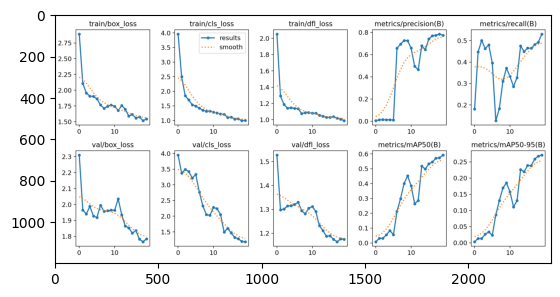

In [26]:
image_path=plt.imread("/content/YoloV8/train_result/train9/results.png")

fig, ax = plt.subplots()
ax.imshow(image_path)

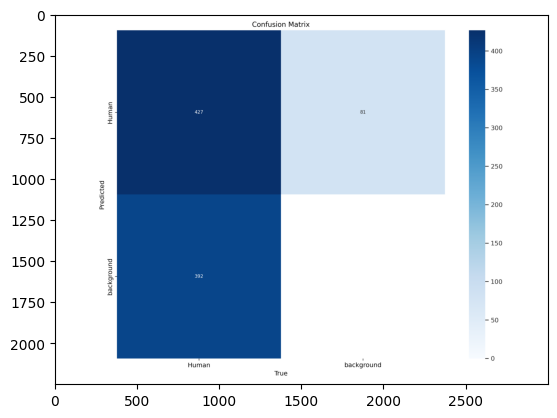

In [27]:
confusion_matrix=plt.imread("/content/YoloV8/train_result/train9/confusion_matrix.png")


fig,ax=plt.subplots()
ax.imshow(confusion_matrix)

#Model_Validation

In [28]:
model =YOLO("/content/YoloV8/train_result/train9/weights/best.pt")

model.val(data="/content/YoloV8/data.yaml",conf=0.5)

Ultralytics YOLOv8.0.117 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/YoloV8/val/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.52s/it]
                   all        100        819       0.96      0.348      0.656      0.386
Speed: 4.2ms preprocess, 35.8ms inference, 0.0ms loss, 11.3ms postprocess per image
Results saved to runs/detect/val


ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7f3ee6e6d7e0>
fitness: 0.4128899093123851
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([     0.3859])
names: {0: 'Human'}
plot: True
results_dict: {'metrics/precision(B)': 0.9595959595959596, 'metrics/recall(B)': 0.34798534798534797, 'metrics/mAP50(B)': 0.6557658852075899, 'metrics/mAP50-95(B)': 0.3859036897684735, 'fitness': 0.4128899093123851}
save_dir: PosixPath('runs/detect/val')
speed: {'preprocess': 4.1635870933532715, 'inference': 35.809805393218994, 'loss': 0.0013089179992675781, 'postprocess': 11.27939224243164}

In [30]:
val_result=os.listdir("/content/runs/detect/val")
print(val_result)


['P_curve.png', 'val_batch2_labels.jpg', 'val_batch1_labels.jpg', 'confusion_matrix.png', 'val_batch2_pred.jpg', 'val_batch0_labels.jpg', 'val_batch1_pred.jpg', 'PR_curve.png', 'val_batch0_pred.jpg', 'R_curve.png', 'confusion_matrix_normalized.png', 'F1_curve.png']


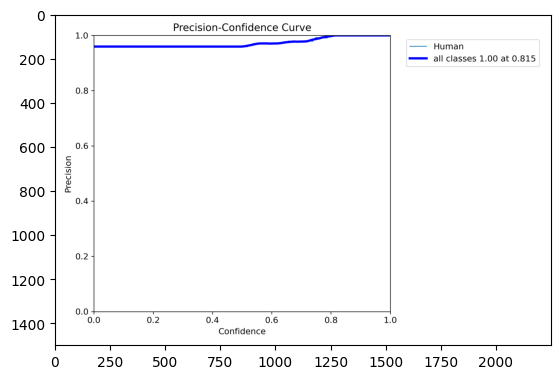

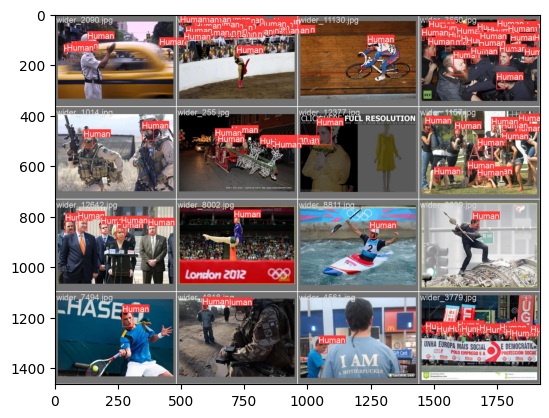

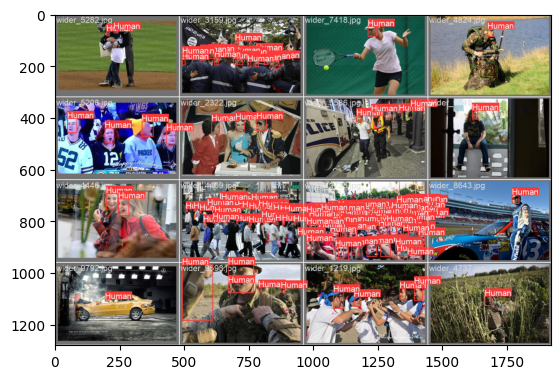

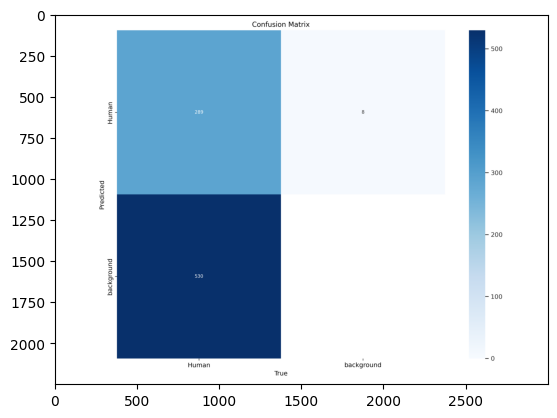

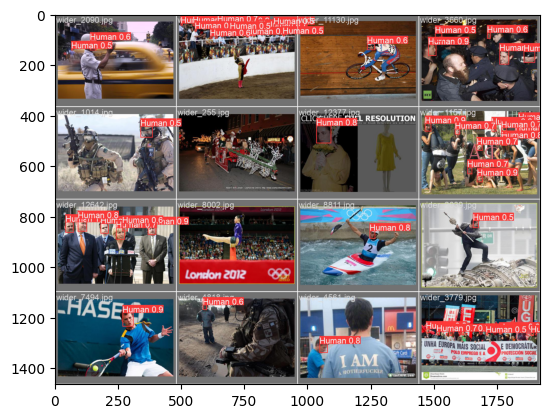

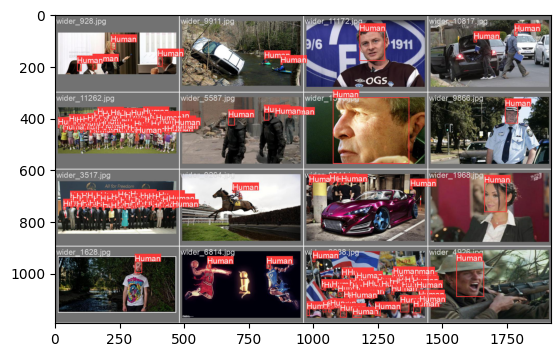

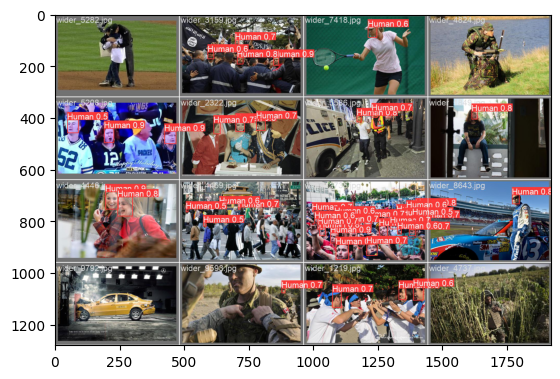

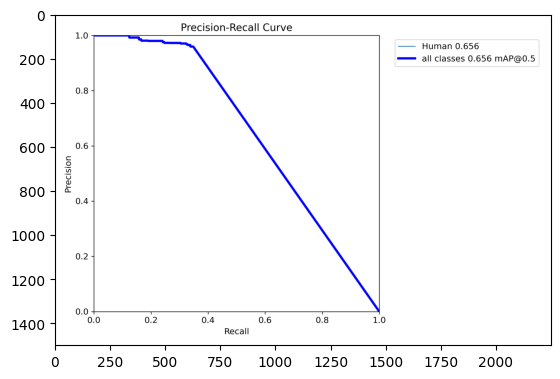

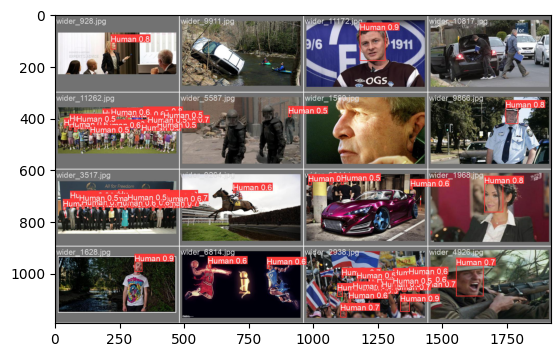

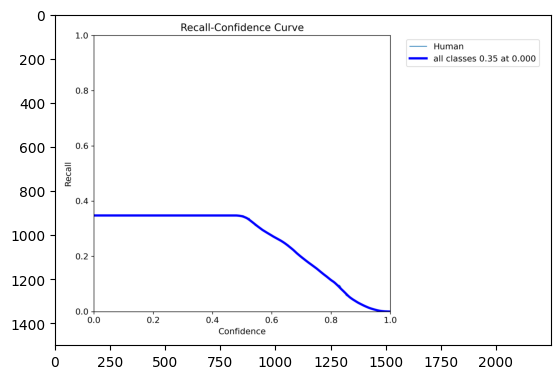

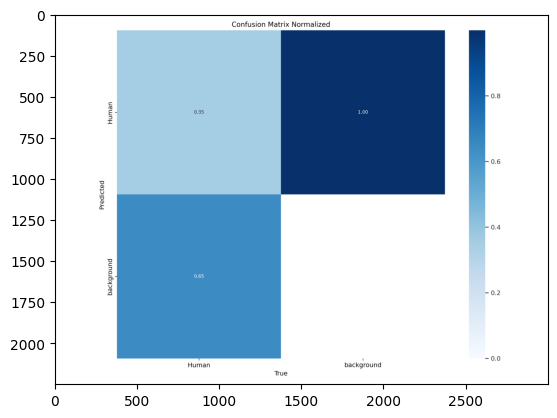

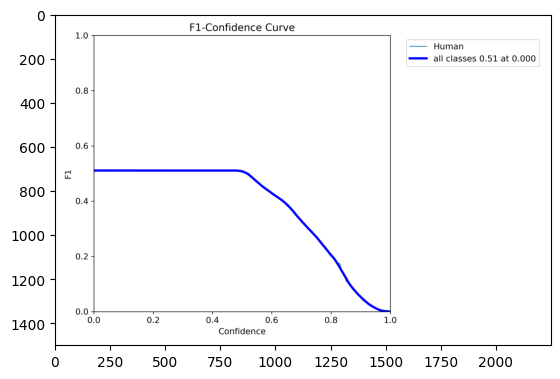

In [34]:
for path in val_result:
  image=plt.imread('/content/runs/detect/val/'+path)
  fig,ax=plt.subplots()
  ax.imshow(image)

#Let's test it with new image 

In [35]:
model.predict(source='/content/group-of-young-people-smiling.jpg',save=True,conf=0.5)


image 1/1 /content/group-of-young-people-smiling.jpg: 448x640 7 Humans, 74.1ms
Speed: 3.0ms preprocess, 74.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'Human'}
 orig_img: array([[[217, 205, 181],
         [214, 202, 178],
         [214, 202, 178],
         ...,
         [247, 240, 220],
         [243, 236, 216],
         [249, 242, 222]],
 
        [[213, 201, 177],
         [211, 199, 175],
         [211, 199, 175],
         ...,
         [248, 241, 221],
         [245, 238, 218],
         [250, 243, 223]],
 
        [[214, 202, 178],
         [213, 201, 177],
         [213, 201, 177],
         ...,
         [245, 238, 218],
         [242, 235, 215],
         [246, 239, 219]],
 
        ...,
 
        [[ 26, 155, 200],
         [ 25, 156, 200],
         [ 27, 157, 200],
         ...,
         [ 31,  40,  49],
         [ 30,  42,  52],
         [ 30,  44,  56]],
 
        [[ 25, 156, 200],
         [ 23, 156, 200],
         [ 25, 156, 200],
         ...,
   

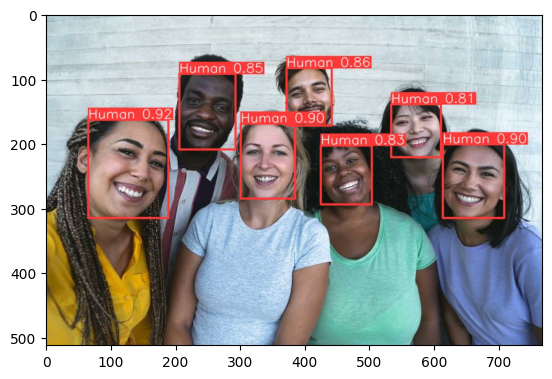

In [36]:
predicted=plt.imread("/content/runs/detect/predict/group-of-young-people-smiling.jpg")

fig,ax=plt.subplots()

ax.imshow(predicted)

**BAMMM**